In [54]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')


#### Data understanding & cleaning

In [55]:
df=pd.read_csv('Diwali.csv',encoding='unicode_escape')

In [56]:
df.shape

(11251, 15)

In [75]:
df.loc[df['Marital_Status']==0,'Marital_Status']='Unmarried'
df.loc[df['Marital_Status']==1,'Marital_Status']='Married'


In [58]:
df.drop(columns=['Status','unnamed1'],inplace=True)

In [59]:
df.dropna(inplace=True)

### EDA

In [60]:
df.describe()

,User_ID,Age,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,2.489634,9453.610858
std,1.716039e+03,12.753866,1.114967,5222.355869
min,1.000001e+06,12.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,4.000000,23952.000000


In [61]:
df.describe(include=object)

,Cust_name,Product_ID,Gender,Age Group,Marital_Status,State,Zone,Occupation,Product_Category
count,11239,11239,11239,11239,11239,11239,11239,11239,11239
unique,1250,2350,2,7,2,16,5,15,18
top,Vishakha,P00265242,F,26-35,0,Uttar Pradesh,Central,IT Sector,Clothing & Apparel
freq,42,53,7832,4541,6518,1944,4289,1583,2655


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11239 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11239 non-null  int64  
 1   Cust_name         11239 non-null  object 
 2   Product_ID        11239 non-null  object 
 3   Gender            11239 non-null  object 
 4   Age Group         11239 non-null  object 
 5   Age               11239 non-null  int64  
 6   Marital_Status    11239 non-null  object 
 7   State             11239 non-null  object 
 8   Zone              11239 non-null  object 
 9   Occupation        11239 non-null  object 
 10  Product_Category  11239 non-null  object 
 11  Orders            11239 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(3), object(9)
memory usage: 1.2+ MB


In [63]:
df.rename(columns={'Cust_name': 'Customer'},inplace=True)

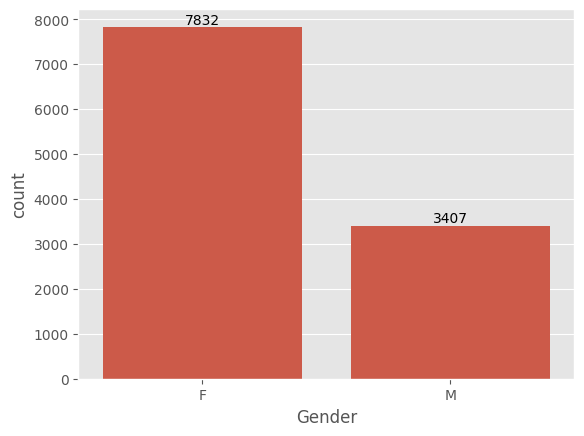

In [64]:
ax=sns.countplot(data=df,x='Gender')
for i in ax.containers:
    ax.bar_label(i)

 the most of the buyers were female

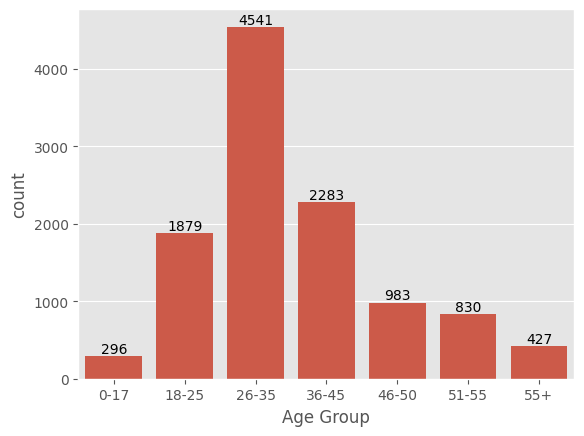

In [65]:
ax=sns.countplot(data=df,x='Age Group',order=['0-17','18-25','26-35','36-45','46-50','51-55','55+'])
for i in ax.containers:
    ax.bar_label(i)

the most buyers were of age group 26-35 and the least were of group 0-17

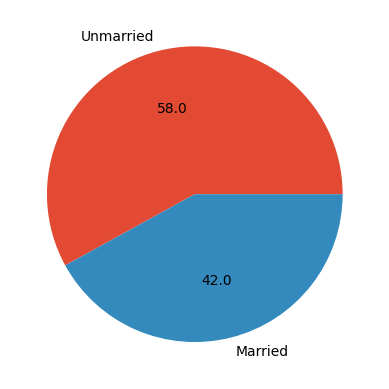

In [82]:
Maritalstatus=df['Marital_Status'].value_counts()
plt.pie(Maritalstatus,labels=Maritalstatus.index,autopct="%1.1f")
plt.show()

the above graph shows maximum of buyers are unmarried


In [83]:
df.head()

,User_ID,Customer,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,Unmarried,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,Married,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,Married,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,Unmarried,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,Married,Gujarat,Western,Food Processing,Auto,2,23877.0


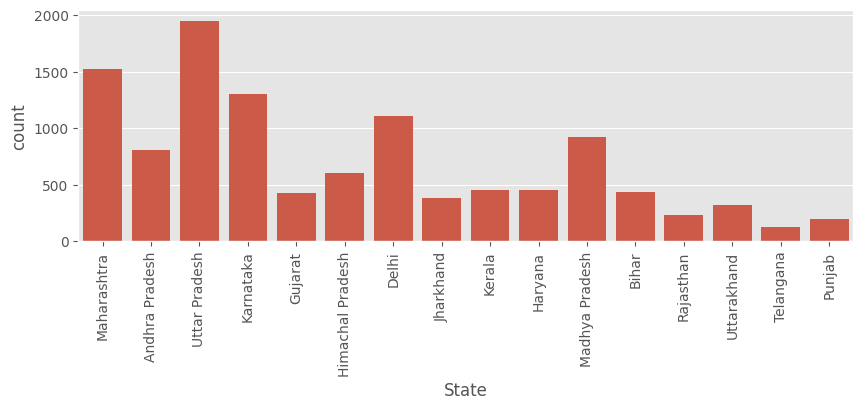

In [89]:
plt.figure(figsize=(10,3))
sns.countplot(df,x='State')

plt.xticks(rotation=90)
plt.show()

the most purchases are from Uttar Pradesh


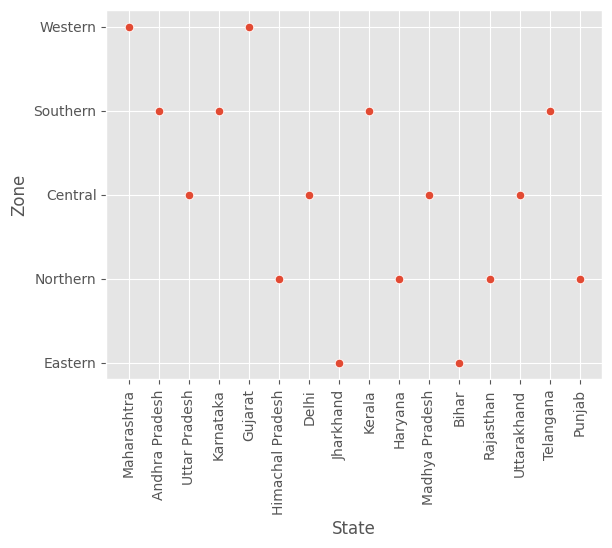

In [97]:
sns.scatterplot(df,x='State',y='Zone')
plt.xticks(rotation=90)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

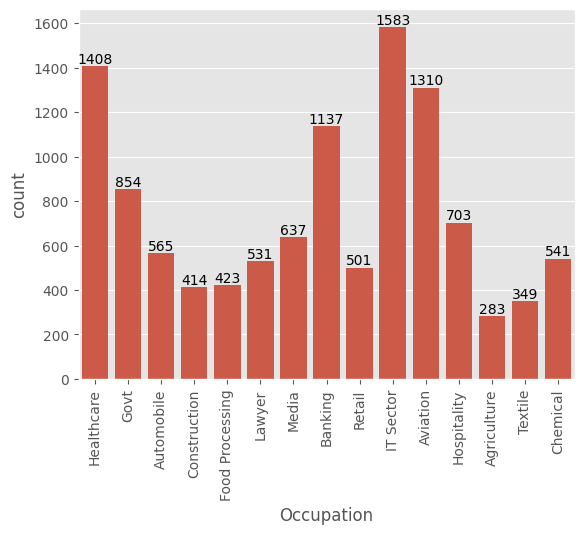

In [101]:
ax=sns.countplot(df,x='Occupation')
for i in ax.containers:
    ax.bar_label(i)
plt.xticks(rotation=90)
plt.show

<Axes: xlabel='Age Group', ylabel='count'>

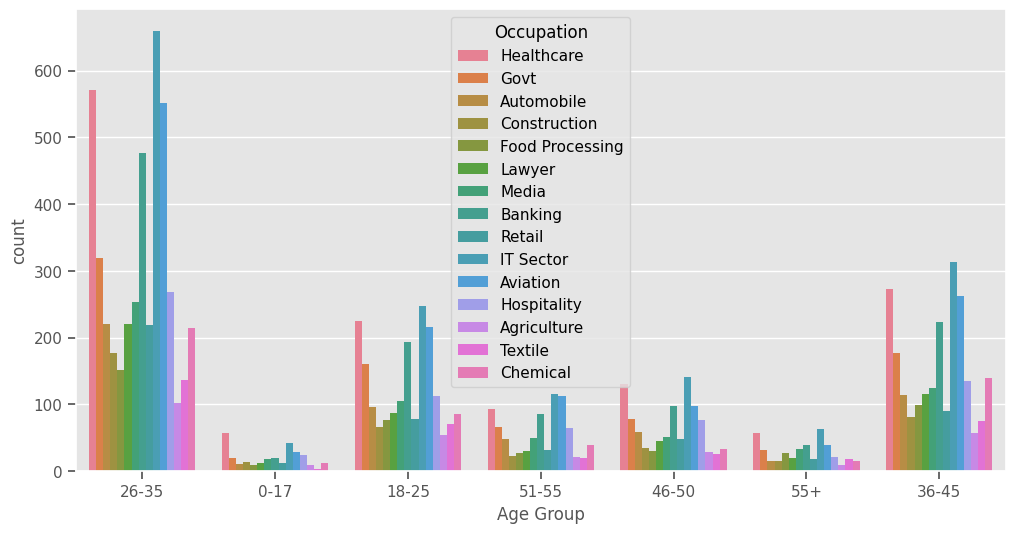

In [122]:
sns.set_context('notebook')
plt.figure(figsize=(12,6))
sns.countplot(data=df,x='Age Group',hue='Occupation')


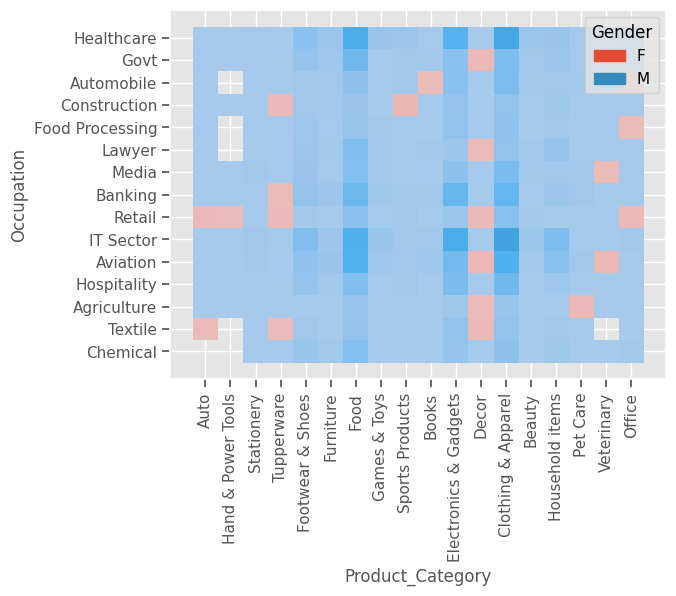

In [151]:
# dfg=sns.PairGrid(df,hue='Gender',x_vars=['Product_Category'],y_vars=['Occupation'],height=5)
# dfg.map(plt.scatter)
# plt.legend()


sns.histplot(df,x='Product_Category',y='Occupation',hue='Gender')
plt.xticks(rotation=90)
plt.show()
